Mean Squared Error (MSE): 88837.71131405522
Root Mean Squared Error (RMSE): 298.0565572404929
R² Score: 0.6094505788934057
Adjusted R² Score: 0.517138897540938


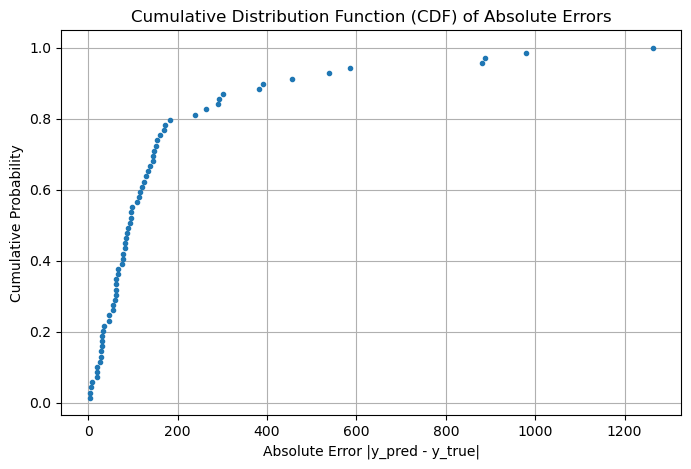

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from tabpfn import TabPFNRegressor  # falls du TabPFN nutzt


train_df = pd.read_csv("data/train_data.csv")
dev_df = pd.read_csv("data/development_data.csv")

target_column = "PullTest (N)"  
X_train = train_df.drop(columns=[target_column])
y_train = train_df[target_column]
X_dev = dev_df.drop(columns=[target_column])
y_dev = dev_df[target_column]

regressor = TabPFNRegressor()
regressor.fit(X_train, y_train)

predictions = regressor.predict(X_dev)

mse = mean_squared_error(y_dev, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_dev, predictions)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)

abs_errors = np.abs(predictions - y_dev)
sorted_errors = np.sort(abs_errors)
cdf = np.arange(1, len(sorted_errors)+1) / len(sorted_errors)

plt.figure(figsize=(8, 5))
plt.plot(sorted_errors, cdf, marker='.', linestyle='none')
plt.xlabel('Absolute Error |y_pred - y_true|')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution Function (CDF) of Absolute Errors')
plt.grid(True)
plt.show()

## Coefficient of Determination (R²)

The coefficient of determination, denoted as $( R^2 )$, is a commonly used metric to evaluate the performance of a regression model. It indicates how well the model explains the variance in the target variable \( y \).

### Definition

The formula for $( R^2 )$ is:

$$
R^2 = 1 - \frac{SS_{\text{res}}}{SS_{\text{tot}}}
$$

Where:

- $( SS_{\text{res}} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2)$: Residual Sum of Squares (model error)
-  $(SS_{\text{tot}} = \sum_{i=1}^{n} (y_i - \bar{y})^2)$: Total Sum of Squares (total variance in the data)

### Interpretation

- $( R^2 = 1)$: Perfect prediction – the model explains 100% of the variance in $( y)$
- $( R^2 = 0)$: The model does no better than simply predicting the mean of $( y )$
- $( R^2 < 0 )$: The model performs worse than a constant mean prediction

### Example

In this case, the model achieved an $( R^2 )$ score of **0.61**, which means it explains **61% of the total variance** in the target variable.

This is a moderate-to-good result, indicating that the model captures significant patterns in the data, but there is still room for improvement.

## Mean Squared Error (MSE)

The **Mean Squared Error (MSE)** is a standard regression metric that measures the average of the squared differences between the predicted values and the actual target values.

### Definition

$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$

Where:

- $y_i$: true value  
- $\hat{y}_i$: predicted value  
- $n$: number of samples

### Interpretation

- MSE penalizes larger errors more strongly due to squaring.
- The result is in the **squared unit** of the target variable (e.g., mm², N², €²).
- A **lower MSE** indicates better prediction accuracy.
- Because of squaring, the MSE is sensitive to **outliers**.

### Example

In this case, the model yielded an MSE of **88,837**, which may seem large, but this must be interpreted in the context of the unit and range of the target variable.

## Root Mean Squared Error (RMSE)

The **Root Mean Squared Error (RMSE)** is the square root of the MSE and represents the average prediction error in the same unit as the target variable.

### Definition

$RMSE = \sqrt{ \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 } = \sqrt{MSE}$

### Interpretation

- RMSE is easier to interpret than MSE because it is in the **original unit** of the target variable.
- It gives a direct sense of **how far off predictions are**, on average.
- Like MSE, it is also sensitive to outliers due to the squaring.

### Example

In this case, the RMSE is approximately **298 N**.  
Given that the mean of the target variable (PullTest) is **2953 N**, this corresponds to a **relative prediction error of about 10.1 %**.

This means that, on average, the model's predictions deviate from the true pull test values by approximately 298 N.
